In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

In [23]:
Data = pd.read_excel('coef.xlsx')
a = np.array([-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13])
q = 197.64
S = 0.407
c = 0.22
b = 1.85
Data

,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-4.020000,-3.830000,-3.090000,-3.530000,-3.180000,-2.810000,-1.330000,-1.640000,0.630000,-1.490000,1.350000,2.310000,3.030000,3.840000,3.920000,1.570000,4.000000,1.560000
1,5.540000,12.390000,18.220000,25.960000,29.650000,37.310000,42.500000,48.300000,54.040000,57.200000,68.400000,72.490000,75.750000,79.390000,81.730000,75.470000,80.830000,78.610000
2,-0.080000,0.070000,-0.080000,0.040000,0.271000,0.031000,0.009000,0.045000,0.040000,0.020000,0.040000,0.020000,0.120000,0.010000,0.100000,-0.050000,0.140000,0.120000
3,-0.010000,0.010000,-0.010000,0.030000,0.080000,-0.010000,-0.020000,-0.020000,0.000000,0.000000,0.000000,-0.060000,0.030000,-0.040000,0.040000,0.050000,0.070000,0.100000
4,-0.010000,0.050000,0.010000,0.050000,0.040000,0.000000,0.050000,0.020000,0.070000,0.030000,0.040000,0.040000,0.070000,0.030000,0.000000,-0.030000,0.050000,0.020000
5,2.300000,2.320000,1.890000,2.270000,2.350000,2.160000,1.590000,2.380000,2.730000,2.510000,2.210000,1.810000,1.570000,0.900000,0.840000,-0.780000,0.180000,0.110000
6,5.247347,12.168531,18.096629,25.896297,29.648296,37.351034,42.523545,48.318699,53.948682,57.106718,67.884635,71.667199,74.594532,77.811633,79.807511,73.782361,78.231305,76.247895
7,3.619467,3.179979,2.454707,3.076129,3.176002,3.459785,2.809400,4.163731,4.392188,6.466616,5.803523,6.536663,7.540391,8.616321,10.322937,12.852548,12.887336,16.157114


In [24]:
fx = Data.loc[0].to_numpy()
fy = Data.loc[1].to_numpy()
fz = Data.loc[2].to_numpy()

Mx = Data.loc[3].to_numpy()
My = Data.loc[4].to_numpy()
Mz = Data.loc[5].to_numpy()

cx = fx/(S*q)
cy = fy/(S*q)
cz = fz/(S*q)
mx = Mx/(S*q*b)
my = My/(S*q*b)
mz = Mz/(S*q*c)

L = Data.loc[6].to_numpy()
D = Data.loc[7].to_numpy()
K = L/D

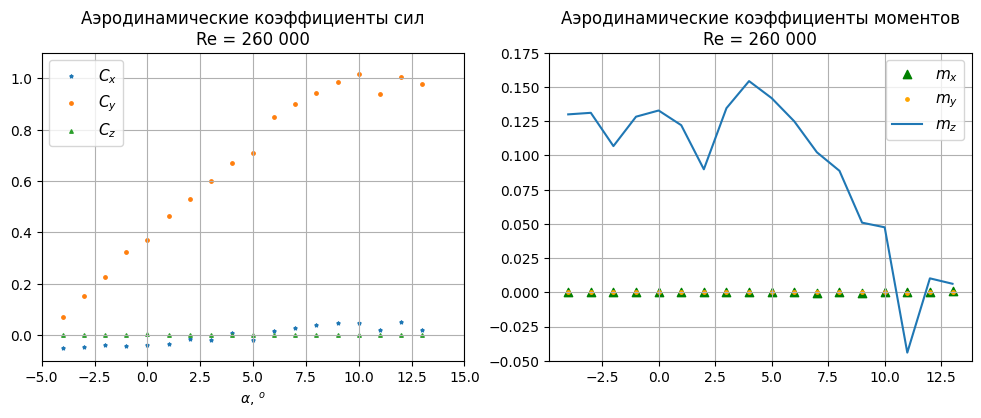

In [25]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax = ax.ravel()

fcy_ = interp1d(a, cy, 'cubic')
p = np.polyfit(a, cy, 2)

ax[0].scatter(a, cx, s=6, marker='*', label=r'$C_{x}$')
ax[0].scatter(a, cy, s=6, label=r'$C_{y}$')
# ax[0].plot(np.linspace(-4,13), np.polyval(p, np.linspace(-4,13)))
ax[0].scatter(a, cz, s=6, marker='^', label=r'$C_{z}$')
ax[0].grid('Major')
ax[0].legend(fontsize=11)
# ax[0].set_ylabel(r'$C_{x}, C_{y}, C_{z}$')
ax[0].set_xlabel(r'$\alpha$, $^{o}$')
ax[0].set_xlim(-5, 15)
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title('Аэродинамические коэффициенты сил\nRe = 260 000')

ax[1].scatter(a, mx, marker='^', c='green', label=r'$m_{x}$')
ax[1].scatter(a, my, s=6, c='orange', label=r'$m_{y}$')
ax[1].plot(a, mz, label=r'$m_{z}$')
ax[1].grid('Major')
# ax[1].set_xlim(10,12)
ax[1].set_ylim(-0.05, 0.175)
ax[1].set_title('Аэродинамические коэффициенты моментов\nRe = 260 000')
ax[1].legend(fontsize=11)


# plt.savefig('coef.png', dpi=300, pad_inches=0, bbox_inches='tight')


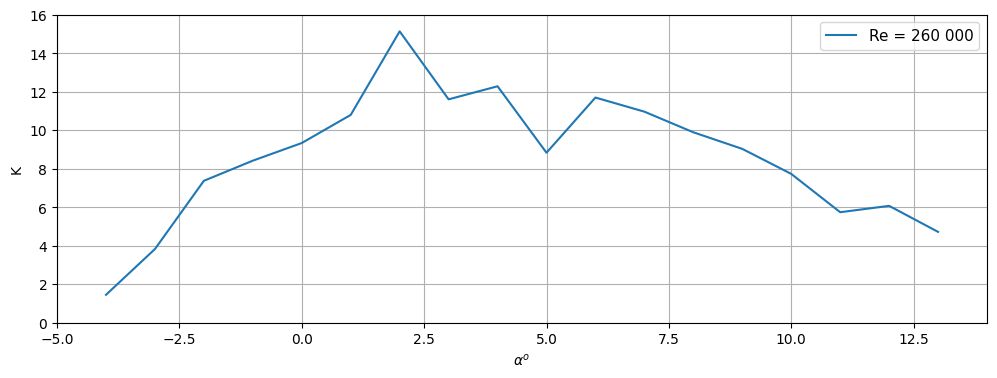

In [26]:
fig1, ax1 = plt.subplots(1,1, figsize=(12,4))
ax1.plot(a, K, label = 'Re = 260 000')
ax1.grid('Major')
ax1.set_xlim(-5,14)
ax1.set_ylim(0,16)
ax1.set_xlabel(r'$\alpha ^{o}$')
ax1.set_ylabel('K')
ax1.legend(fontsize=11)
# ax1.set_title('Зависимость аэродинамического качества ЛА от угла атаки')
plt.savefig('quality.png', dpi=300, bbox_inches='tight', pad_inches=0)

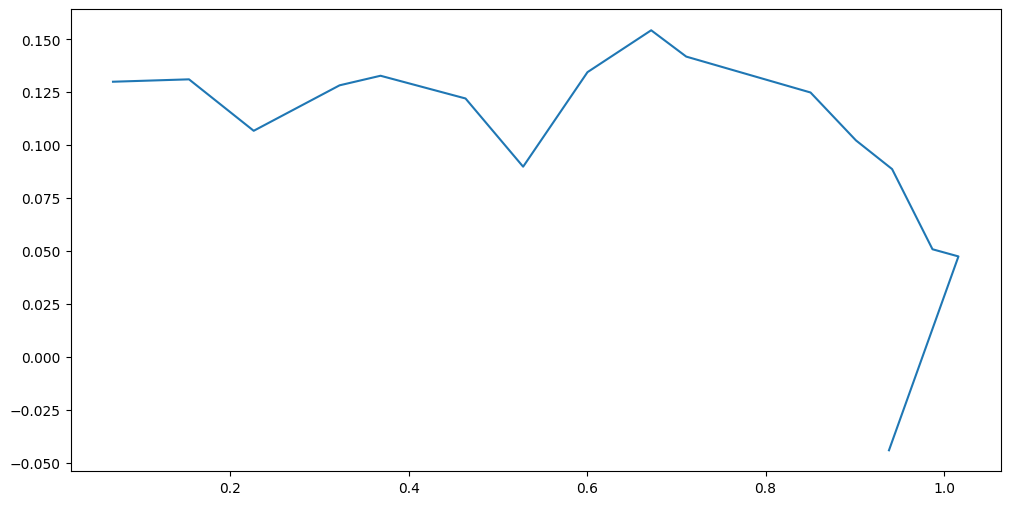

In [39]:
fig2, ax2 = plt.subplots(1,1, figsize = (12,6))
ax2.plot(cy[0:-2], mz[0:-2])